In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [67]:
df = pd.read_csv('Data/kc_house_data_train.csv')
print(df.shape)
df.head()

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [3]:
# Get column names
column_names = df.columns
print(column_names)
# Get column data types
df.dtypes

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.drop(columns=['Unnamed: 0', 'id','date'], inplace = True)

In [5]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [7]:
df['price'].describe()

count    1.729000e+04
mean     5.407395e+05
std      3.733190e+05
min      7.500000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:>

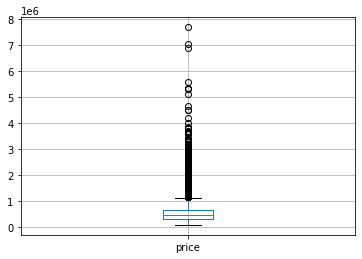

In [8]:
df.boxplot(['price'])

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

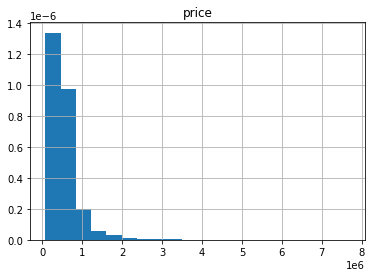

In [9]:
df.hist(column=['price'], bins=20, density =True)

<AxesSubplot:xlabel='waterfront'>

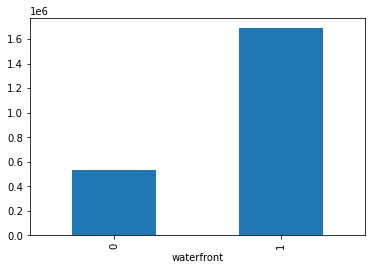

In [10]:
df.groupby('waterfront')['price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='condition'>

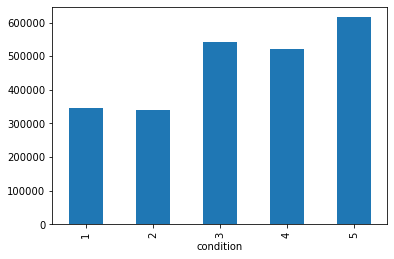

In [11]:
df.groupby('condition')['price'].mean().plot(kind='bar')

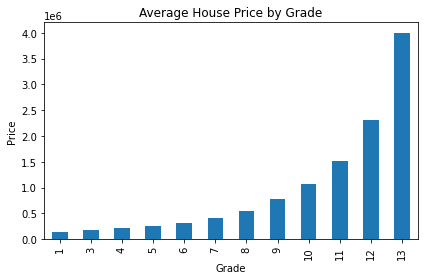

In [12]:
ax= df.groupby('grade')['price'].mean().plot(kind='bar')
ax.set_title('Average House Price by Grade')
ax.set_xlabel('Grade')
ax.set_ylabel('Price')

plt.tight_layout()
plt.savefig('Data_Visualizations/Average_House_Price_by_Grade.png')
plt.show()

<AxesSubplot:xlabel='view'>

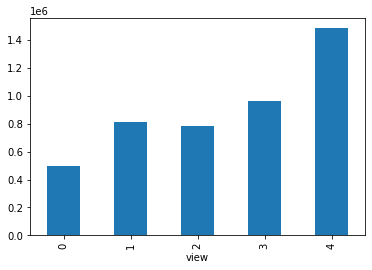

In [13]:
df.groupby('view')['price'].mean().plot(kind='bar')

In [14]:
df['floors'].value_counts()

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

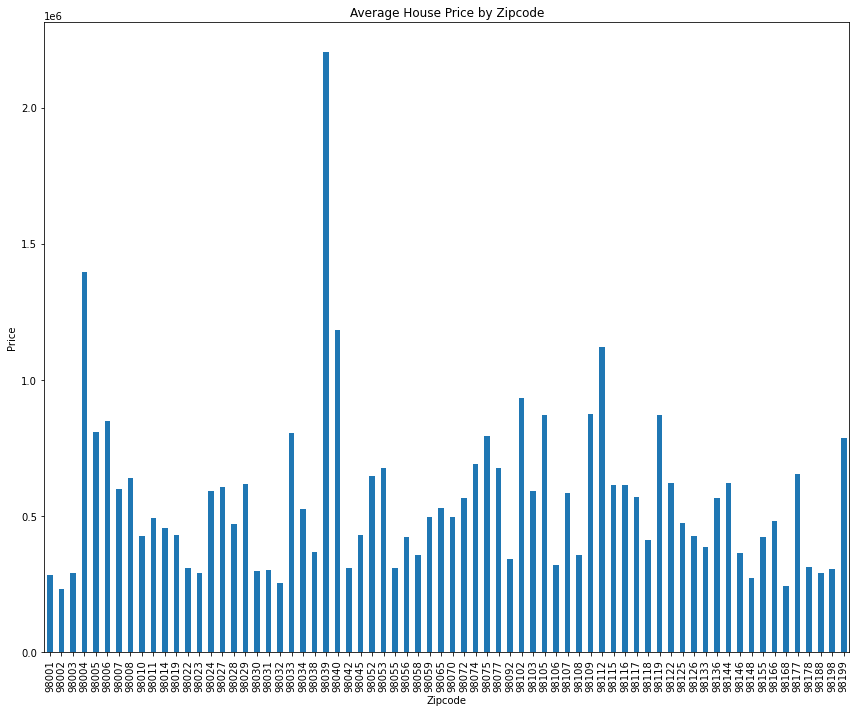

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
ax = df.groupby('zipcode')['price'].mean().plot(kind='bar')
ax.set_title('Average House Price by Zipcode')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price')

plt.tight_layout()
plt.savefig('Data_Visualizations/Average_House_Price_by_Zipcode.png')
plt.show()

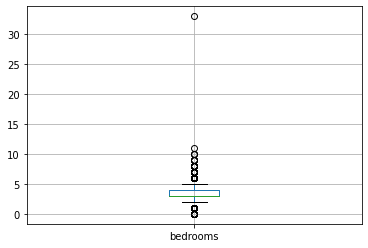

In [16]:
ax = df.boxplot(['bedrooms'])
plt.savefig('Data_Visualizations/bedroom_boxplot.png')

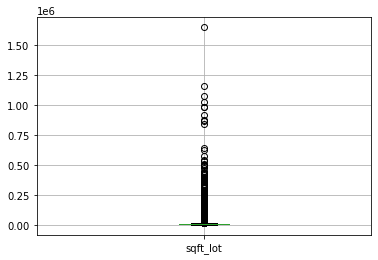

In [17]:
ax = df.boxplot(['sqft_lot'])
plt.savefig('Data_Visualizations/Sqft_Lot_Boxplot.png')

In [18]:
df.groupby('yr_built')['price'].mean()

yr_built
1900    588646.242857
1901    555805.680000
1902    676645.454545
1903    480985.472222
1904    599607.055556
            ...      
2011    537078.900000
2012    525477.531746
2013    673810.053254
2014    691102.339956
2015    760906.034483
Name: price, Length: 116, dtype: float64

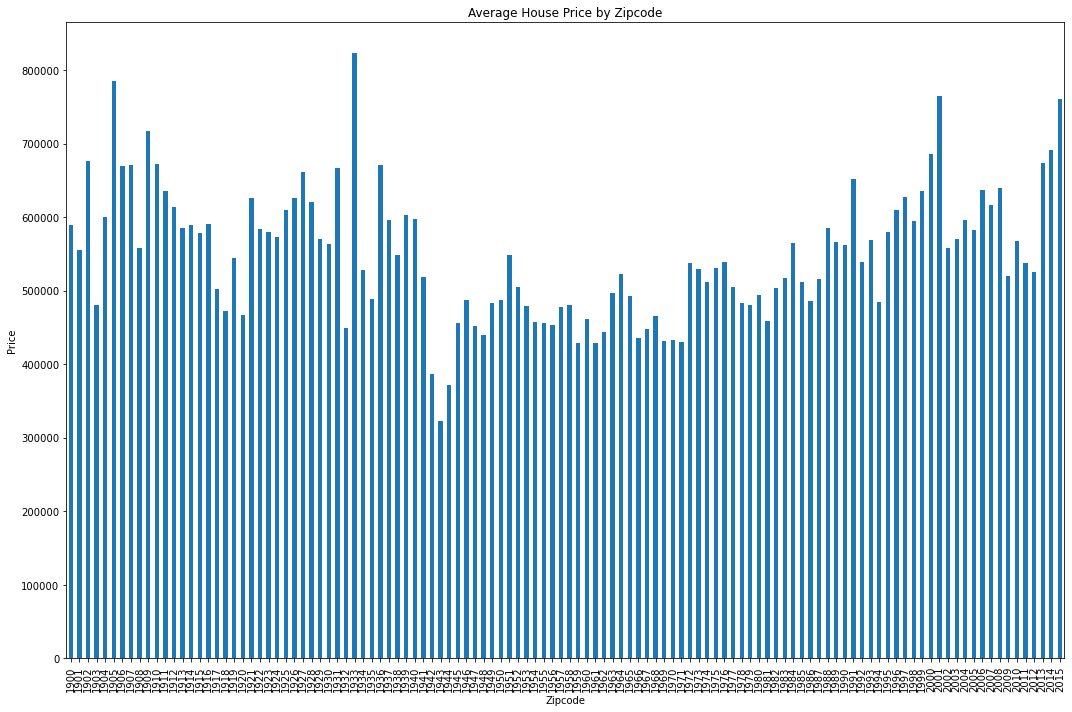

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax = df.groupby('yr_built')['price'].mean().plot(kind='bar')
ax.set_title('Average House Price by Zipcode')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='bedrooms'>

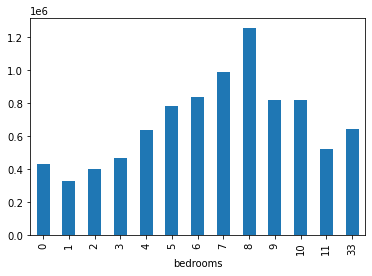

In [20]:
df.groupby('bedrooms')['price'].mean().plot(kind='bar')

In [21]:
df['sqft_range'] = pd.cut(df['sqft_living'], bins=[0, 1000, 2000, 3000, 4000, 5000, np.inf])

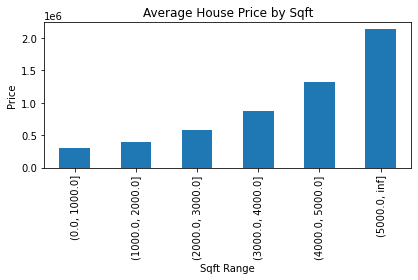

In [22]:
ax = df.groupby('sqft_range')['price'].mean().plot(kind='bar')
ax.set_xlabel('Sqft Range')
ax.set_ylabel('Price')
ax.set_title('Average House Price by Sqft')
plt.tight_layout()
plt.savefig('Data_Visualizations/Average_House_Price_by_Sqft.png')

In [23]:
df.groupby('sqft_range')['price'].mean()

sqft_range
(0.0, 1000.0]       2.960697e+05
(1000.0, 2000.0]    3.992959e+05
(2000.0, 3000.0]    5.764738e+05
(3000.0, 4000.0]    8.782635e+05
(4000.0, 5000.0]    1.327722e+06
(5000.0, inf]       2.134886e+06
Name: price, dtype: float64

In [24]:
df['sqft_percentage'] = df['sqft_living'] / df['sqft_lot']

In [25]:
#Converting yr_built column into datetime.
df['dt_yr_built'] = pd.to_datetime(df['yr_built'].astype(str), format='%Y')

In [26]:
df['decade_built'] = ((df['dt_yr_built'].dt.year//10)*10)

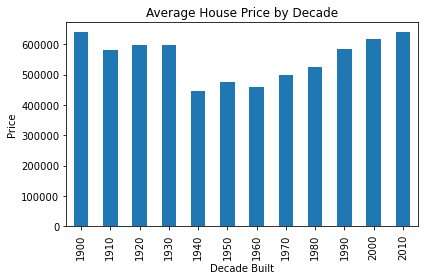

In [27]:
#Comparing the avg price of houses by decade.
ax = df.groupby('decade_built')['price'].mean().plot(kind='bar')
ax.set_xlabel('Decade Built')
ax.set_ylabel('Price')
ax.set_title('Average House Price by Decade')
plt.tight_layout()
plt.savefig('Data_Visualizations/Average_House_Price_by_Decade.png')

In [28]:
df.groupby('decade_built')['price'].mean()

decade_built
1900    640229.312621
1910    580098.425499
1920    597525.566253
1930    597864.548463
1940    447232.918919
1950    474659.752257
1960    459404.440222
1970    499863.001114
1980    524219.988063
1990    584056.096218
2000    617365.948857
2010    640020.592065
Name: price, dtype: float64

In [29]:
word = 'zipcode_'
zipcode_list = df['zipcode'].unique().astype(str).tolist()
[word + x for x in zipcode_list]
len(zipcode_list)

70

In [30]:
df = pd.get_dummies(df, columns = ['zipcode'], drop_first = True)

In [31]:
# Get column names
column_names = df.columns
print(column_names)
len(column_names)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_range', 'sqft_percentage',
       'dt_yr_built', 'decade_built', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipco

91

In [32]:
df.shape

(17290, 91)

In [33]:
df['log_sqft_living'] =np.log(df['sqft_living'])

In [34]:
df['log_sqft_lot'] =np.log(df['sqft_lot'])

In [35]:
df.loc[df.sqft_living >= 7000, "sqft_living"] = 7000

In [36]:
df.loc[df.sqft_lot >= 500000, "sqft_lot"] = 500000

In [37]:
df.loc[df.bathrooms >= 6, "bathrooms"] = 6

In [38]:
df.loc[df.bedrooms >= 10, "bedrooms"] = 10

In [39]:
df.loc[df.sqft_lot15 >= 500000, "sqft_lot15"] = 500000

In [40]:
df.shape

(17290, 93)

In [41]:
model_data = ['yr_built', 'sqft_living', 'sqft_lot', 'sqft_percentage', 'grade', 'condition', 'floors', 
              'bathrooms','bedrooms','sqft_living15', 'sqft_lot15', 'log_sqft_living', 'log_sqft_lot',
            'zipcode_98058','zipcode_98115','zipcode_98006', 'zipcode_98034', 'zipcode_98052', 'zipcode_98031', 'zipcode_98007', 
            'zipcode_98199', 'zipcode_98027', 'zipcode_98119', 'zipcode_98122', 'zipcode_98155','zipcode_98055','zipcode_98118', 'zipcode_98014',
            'zipcode_98059', 'zipcode_98004', 'zipcode_98053', 'zipcode_98072', 'zipcode_98133', 'zipcode_98092','zipcode_98074',
            'zipcode_98125', 'zipcode_98045','zipcode_98106','zipcode_98022', 'zipcode_98177', 'zipcode_98008', 'zipcode_98002',
            'zipcode_98040', 'zipcode_98029', 'zipcode_98042','zipcode_98065','zipcode_98056','zipcode_98144','zipcode_98188',
            'zipcode_98109', 'zipcode_98010', 'zipcode_98075', 'zipcode_98198', 'zipcode_98030', 'zipcode_98105','zipcode_98023',
            'zipcode_98028', 'zipcode_98112', 'zipcode_98038', 'zipcode_98116', 'zipcode_98103', 'zipcode_98178','zipcode_98168','zipcode_98005',
            'zipcode_98077','zipcode_98146','zipcode_98011','zipcode_98126','zipcode_98108', 'zipcode_98136', 'zipcode_98033',
            'zipcode_98003', 'zipcode_98117','zipcode_98107','zipcode_98019','zipcode_98102','zipcode_98032', 'zipcode_98148',
 'zipcode_98166', 'zipcode_98070', 'zipcode_98024','zipcode_98039']
df[model_data].corr()

,yr_built,sqft_living,sqft_lot,sqft_percentage,grade,condition,floors,bathrooms,bedrooms,sqft_living15,sqft_lot15,log_sqft_living,log_sqft_lot,zipcode_98058,zipcode_98115,zipcode_98006,zipcode_98034,zipcode_98052,zipcode_98031,zipcode_98007,zipcode_98199,zipcode_98027,zipcode_98119,zipcode_98122,zipcode_98155,zipcode_98055,zipcode_98118,zipcode_98014,zipcode_98059,zipcode_98004,zipcode_98053,zipcode_98072,zipcode_98133,zipcode_98092,zipcode_98074,zipcode_98125,zipcode_98045,zipcode_98106,zipcode_98022,zipcode_98177,zipcode_98008,zipcode_98002,zipcode_98040,zipcode_98029,zipcode_98042,zipcode_98065,zipcode_98056,zipcode_98144,zipcode_98188,zipcode_98109,zipcode_98010,zipcode_98075,zipcode_98198,zipcode_98030,zipcode_98105,zipcode_98023,zipcode_98028,zipcode_98112,zipcode_98038,zipcode_98116,zipcode_98103,zipcode_98178,zipcode_98168,zipcode_98005,zipcode_98077,zipcode_98146,zipcode_98011,zipcode_98126,zipcode_98108,zipcode_98136,zipcode_98033,zipcode_98003,zipcode_98117,zipcode_98107,zipcode_98019,zipcode_98102,zipcode_98032,zipcode_98148,zipcode_98166,zipcode_98070,zipcode_98024,zipcode_98039
yr_built,1.000000,0.323908,0.065668,0.280325,0.448003,-0.358921,0.483657,0.509898,0.159526,0.332340,0.077192,0.352652,-0.001092,0.036751,-0.126756,0.042709,0.029319,0.082900,0.043217,-0.000745,-0.064279,0.077604,-0.084383,-0.084505,-0.045476,-0.003461,-0.114048,0.024882,0.090174,0.004090,0.128415,0.041278,-0.038598,0.085175,0.095351,-0.052353,0.046845,-0.024306,-0.002326,-0.038187,-0.017545,-0.014532,0.001235,0.110811,0.083710,0.104905,0.030898,-0.066082,-0.013108,-0.065926,0.021691,0.101324,-0.019349,0.047990,-0.099297,0.043298,0.027224,-0.101527,0.140347,-0.075538,-0.109130,-0.058986,-0.069587,-0.004000,0.044083,-0.058766,0.035448,-0.079236,-0.040962,-0.052494,0.040556,0.024727,-0.127767,-0.038309,0.066101,-0.052465,-0.014487,-0.016307,-0.048674,-0.003825,0.001273,0.008638
sqft_living,0.323908,1.000000,0.188873,0.083715,0.766292,-0.061811,0.359687,0.754267,0.591169,0.759868,0.178195,0.958968,0.341836,-0.006878,-0.046391,0.129227,-0.018715,0.054429,-0.015814,0.000721,0.014110,0.061257,-0.005558,-0.039345,-0.049209,-0.033776,-0.071856,0.002255,0.053797,0.113510,0.079630,0.033980,-0.077789,0.019947,0.090546,-0.045152,-0.006825,-0.081533,-0.030676,0.015443,0.006095,-0.048748,0.126023,0.030090,-0.020987,0.063012,-0.007414,-0.013667,-0.025547,-0.000019,0.006245,0.130258,-0.041974,-0.012832,0.010452,-0.014028,0.006787,0.056444,0.014525,-0.031484,-0.076545,-0.041754,-0.075144,0.059786,0.083560,-0.057994,0.017209,-0.073902,-0.038686,-0.041589,0.049773,-0.017751,-0.075645,-0.059234,0.012743,0.007908,-0.032034,-0.026972,0.001765,-0.014348,0.019182,0.091430
sqft_lot,0.065668,0.188873,1.000000,-0.289315,0.126626,-0.015924,-0.004366,0.096116,0.036294,0.160733,0.766998,0.165484,0.705029,0.017597,-0.043946,-0.007354,-0.022012,-0.017304,-0.009191,-0.011163,-0.032987,0.065742,-0.029427,-0.037583,-0.019730,-0.015897,-0.039841,0.151579,-0.002484,-0.004072,0.084848,0.052530,-0.033688,0.071780,-0.002467,-0.027925,0.099915,-0.033038,0.138673,-0.011712,-0.015206,-0.019855,-0.004090,-0.024488,0.014440,0.007481,-0.022683,-0.037519,-0.010667,-0.022559,0.065611,0.013803,-0.014045,-0.006947,-0.027227,-0.018865,-0.008761,-0.030838,0.051121,-0.034771,-0.052838,-0.020842,-0.010979,0.010847,0.109511,-0.020167,-0.009257,-0.035533,-0.025448,-0.027844,-0.018214,-0.013314,-0.046707,-0.036666,0.059904,-0.020949,-0.009486,-0.008108,-0.002811,0.165380,0.154654,0.003181
sqft_percentage,0.280325,0.083715,-0.289315,1.000000,0.189174,-0.153409,0.557179,0.291158,0.033046,-0.039216,-0.289131,0.110083,-0.739102,-0.055086,0.058393,-0.037543,-0.042139,-0.014515,-0.033402,-0.021562,0.074523,0.044639,0.125551,0.147088,-0.065447,-0.015240,0.023140,-0.069146,-0.014170,-0.029769,-0.033193,-0.062227,0.008290,-0.041425,-0.022791,-0.010100,-0.073463,0.053440,-0.071961,-0.028214,-0.035329,-0.024584,-0.033288,0.077194,-0.045728,0.034338,-0.019608,0.129122,-0.038311,0.102563,-0.051456,-0.007706,-

In [42]:
mlr_model = ols(formula='price~yr_built+log_sqft_living+log_sqft_lot+sqft_living+sqft_lot+grade+condition+sqft_percentage+bathrooms+bedrooms+zipcode_98058+zipcode_98115+zipcode_98006+zipcode_98034+zipcode_98052+zipcode_98031+zipcode_98007+zipcode_98199+zipcode_98027+zipcode_98119+zipcode_98122+zipcode_98155+zipcode_98055+zipcode_98118+zipcode_98014+zipcode_98059+zipcode_98004+zipcode_98053+zipcode_98072+zipcode_98133+zipcode_98092+zipcode_98074+zipcode_98125+zipcode_98045+zipcode_98106+zipcode_98022+zipcode_98177+zipcode_98008+zipcode_98002+zipcode_98040+zipcode_98029+zipcode_98042+zipcode_98011+zipcode_98065+zipcode_98056+zipcode_98144+zipcode_98188+zipcode_98109+zipcode_98010+zipcode_98075+zipcode_98198+zipcode_98030+zipcode_98105+zipcode_98023+zipcode_98028+zipcode_98112+zipcode_98038+zipcode_98116+zipcode_98103+zipcode_98178+zipcode_98168+zipcode_98005+zipcode_98077+zipcode_98146+zipcode_98011+zipcode_98126+zipcode_98108+zipcode_98136+zipcode_98033+zipcode_98003+zipcode_98117+zipcode_98107+zipcode_98019+zipcode_98102+zipcode_98032+zipcode_98148+zipcode_98166+zipcode_98070+zipcode_98024+zipcode_98039', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     708.0
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:35:59   Log-Likelihood:            -2.3386e+05
No. Observations:               17290   AIC:                         4.679e+05
Df Residuals:                   17210   BIC:                         4.685e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.075e+06   1.81e+05     22.563      0.000    3.72e+06    4.43e+06
yr_built        -1073.7886     81.663    -13.149      0.000   -1233.856    -913.722
log_sqft_living -4.579e+05   1.28e+04    -35.752      0.000   -4.83e+05   -4.33e+05
log_sqft_lot     3.743e+04   5326.185      7.028      0.000     2.7e+04    4.79e+04
sqft_living       367.2937      5.926     61.975      0.000     355.677     378.910
sqft_lot           -0.3350      0.074     -4.501      0.000      -0.481      -0.189
grade            8.407e+04   2152.328     39.059      0.000    7.98e+04    8.83e+04
condition        2.599e+04   2366.081     10.984      0.000    2.14e+04    3.06e+04
sqft_percentage -1.084e+04   1.34e+04     -0.807      0.420   -3.72e+04    1.55e+04
bathrooms        4.784e+04   3261.029     14.669      0.000    4.14e+04    5.42e+04
bedrooms        -2.087e+04   2063.172    -10.113      0.000   -2.49e+04   -1.68e+04
zipcode_98058    2.531e+04   1.42e+04      1.781      0.075   -2546.280    5.32e+04
zipcode_98115    3.211e+05   1.42e+04     22.631      0.000    2.93e+05    3.49e+05
zipcode_98006    2.439e+05   1.44e+04     16.922      0.000    2.16e+05    2.72e+05
zipcode_98034    2.099e+05   1.39e+04     15.115      0.000    1.83e+05    2.37e+05
zipcode_98052    2.193e+05   1.37e+04     16.007      0.000    1.92e+05    2.46e+05
zipcode_98031    1.156e+04   1.64e+04      0.704      0.482   -2.06e+04    4.38e+04
zipcode_98007    2.338e+05   1.97e+04     11.845      0.000    1.95e+05    2.72e+05
zipcode_98199    3.811e+05    1.6e+04     23.811      0.000     3.5e+05    4.12e+05
zipcode_98027    1.452e+05   1.48e+04      9.800      0.000    1.16e+05    1.74e+05
zipcode_98119        5e+05   1.93e+04     25.847      0.000    4.62e+05    5.38e+05
zipcode_98122    3.221e+05   1.69e+04     19.023      0.000    2.89e+05    3.55e+05
zipcode_98155    1.467e+05   1.46e+04     10.071      0.000    1.18e+05    1.75e+05
zipcode_98055    4.927e+04   1.66e+04      2.971      0.003    1.68e+04    8.18e+04
zipcode_98118    1.715e+05   1.44e+04     11.888      0.000    1.43e+05       2e+05
zipcode_98014    7.646e+04   2.13e+04      3.593      0.000    3.47e+04    1.18e+05
zipcode_98059    8.008e+04   1.43e+04      5.587      0.000     5.2e+04    1.08e+05
zipcode_98004    7.567e+05   1.62e+04     46.695      0.000    7.25e+05    7.88e+05
zipcode_98053    1.854e+05   1.49e+04     12.461      0.000    1.56e+05    2.15e+05
zipcode_98072    1.243e+05   1.65e+04      7.539      0.000     9.2e+04    1.57e+05
zipcode_98133     1.55e+05   1.43e+04     10.875      0.000    1.27e+05    1.83e+05
zipcode_98092   -3.574e+04   1.52e+04     -2.344      0.019   -6.56e+04   -5847.134
zipcode_98074    1.638e+05   1.46e+04     11.248      0.000    1.35e+05    1.92e+05
zipcode_98125    2.089e+05   1.49e+04     13.976      0.000

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sqft_range,sqft_percentage,dt_yr_built,decade_built,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,log_sqft_living,log_sqft_lot
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,47.4388,-122.162,2390,7700,"(2000.0, 3000.0]",0.232767,1986-01-01,1980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.635304,9.093020
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,47.6784,-122.285,2370,6283,"(2000.0, 3000.0]",0.430906,1977-01-01,1970,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.972466,8.814330
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,47.5646,-122.129,3710,9685,"(3000.0, 4000.0]",0.346094,1997-01-01,1990,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.234830,9.295876
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,47.6995,-122.228,4050,14226,"(4000.0, 5000.0]",0.312158,1990-01-01,1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.425078,9.589325
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,47.6647,-122.083,2250,4050,"(2000.0, 3000.0]",0.474330,2004-01-01,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.843849,8.589700


In [44]:
# fit a model
#import the class
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm.fit(df[model_data], df['price'])

LinearRegression()

In [45]:
print(lm.intercept_)
print(lm.coef_)

4093178.5228832043
[-1.07315617e+03  3.55801784e+02 -1.91296870e-01 -8.87031320e+03
  7.75339277e+04  2.76705164e+04  4.89796851e+03  4.80752241e+04
 -1.99825646e+04  3.58481464e+01 -2.34940937e-01 -4.60777818e+05
  3.64441318e+04  2.33930564e+04  3.23694013e+05  2.30398415e+05
  2.08785433e+05  2.11657121e+05  8.77519676e+03  2.30447788e+05
  3.81122954e+05  1.38795746e+05  4.99585747e+05  3.23360192e+05
  1.49045171e+05  4.74856790e+04  1.73240747e+05  8.10483910e+04
  7.04000990e+04  7.46177636e+05  1.77769257e+05  1.16892729e+05
  1.58922882e+05 -3.85184191e+04  1.53462435e+05  2.11739413e+05
  8.41990562e+04  1.30835881e+05  1.86958335e+04  2.40788910e+05
  2.80291513e+05  3.37806456e+04  4.88366192e+05  1.98099138e+05
  5.20196785e+03  9.50414612e+04  1.00239239e+05  2.95212306e+05
  3.19985744e+04  4.89786632e+05  4.51719251e+04  1.56312723e+05
  5.01613216e+04  5.04490054e+03  4.60254253e+05 -3.40958305e+04
  1.19382654e+05  5.87385475e+05  3.27031639e+04  3.06703178e+05
  3.35

In [46]:
y_pred = lm.predict(df[model_data])

Text(0, 0.5, 'Predictions')

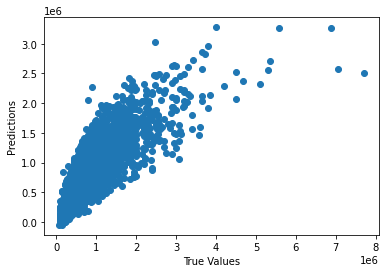

In [47]:
y_pred[:100]
## The line / model
plt.scatter( df['price'], y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mae = mean_absolute_error(df['price'], y_pred)
mse = mean_squared_error(df['price'], y_pred)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

100441.14936904499
180521.41992699


**Plotting the Residuals**

<AxesSubplot:ylabel='price'>

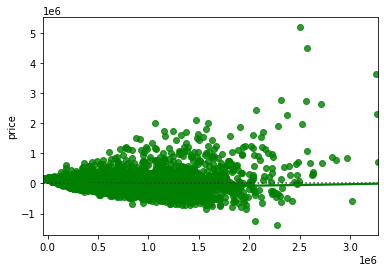

In [50]:
sns.residplot(x=y_pred, y=df['price'], lowess=True, color="g")

**Plotting the Distribution of the Residuals**

In [51]:
residuals =  df['price']- y_pred

/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


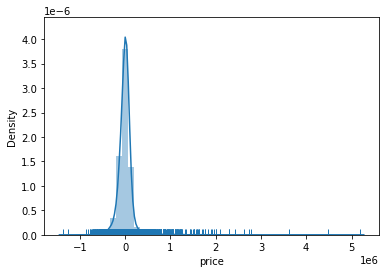

In [52]:
sns.distplot(residuals, kde=True, rug=True);

In [53]:
from scipy import stats


In [54]:
print (stats.shapiro(residuals))

ShapiroResult(statistic=0.6917006373405457, pvalue=0.0)


/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**QQ-Plot To Determine if the Data is Normally Distributed.**

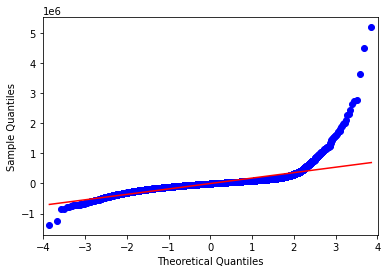

In [55]:
import statsmodels.api as sm 

fig = sm.qqplot(residuals,line='s')
plt.show()

**Using a non-linear tansformation, taking the log of the target variable, to create a linear relationship**

In [56]:
df['log_price'] = np.log(df['price'])

array([[<AxesSubplot:title={'center':'log_price'}>]], dtype=object)

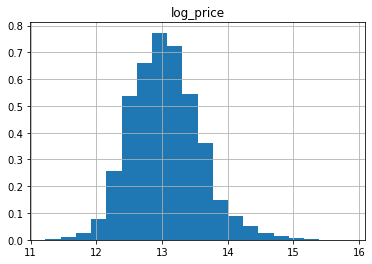

In [57]:
df.hist(column=['log_price'], bins=20, density =True)

In [58]:
mlr_model = ols(formula='log_price~yr_built+log_sqft_living+log_sqft_lot+sqft_living+sqft_lot+grade+condition+sqft_percentage+bathrooms+bedrooms+zipcode_98058+zipcode_98115+zipcode_98006+zipcode_98034+zipcode_98052+zipcode_98031+zipcode_98007+zipcode_98199+zipcode_98027+zipcode_98119+zipcode_98122+zipcode_98155+zipcode_98055+zipcode_98118+zipcode_98014+zipcode_98059+zipcode_98004+zipcode_98053+zipcode_98072+zipcode_98133+zipcode_98092+zipcode_98074+zipcode_98125+zipcode_98045+zipcode_98106+zipcode_98022+zipcode_98177+zipcode_98008+zipcode_98002+zipcode_98040+zipcode_98029+zipcode_98042+zipcode_98011+zipcode_98065+zipcode_98056+zipcode_98144+zipcode_98188+zipcode_98109+zipcode_98010+zipcode_98075+zipcode_98198+zipcode_98030+zipcode_98105+zipcode_98023+zipcode_98028+zipcode_98112+zipcode_98038+zipcode_98116+zipcode_98103+zipcode_98178+zipcode_98168+zipcode_98005+zipcode_98077+zipcode_98146+zipcode_98011+zipcode_98126+zipcode_98108+zipcode_98136+zipcode_98033+zipcode_98003+zipcode_98117+zipcode_98107+zipcode_98019+zipcode_98102+zipcode_98032+zipcode_98148+zipcode_98166+zipcode_98070+zipcode_98024+zipcode_98039', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1365.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:36:57   Log-Likelihood:                 3689.5
No. Observations:               17290   AIC:                            -7219.
Df Residuals:                   17210   BIC:                            -6598.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.0828      0.195     51.714      0.000       9.701      10.465
yr_built           -0.0007   8.82e-05     -7.904      0.000      -0.001      -0.001
log_sqft_living     0.2867      0.014     20.735      0.000       0.260       0.314
log_sqft_lot        0.0486      0.006      8.459      0.000       0.037       0.060
sqft_living         0.0001    6.4e-06     15.672      0.000    8.77e-05       0.000
sqft_lot         1.165e-07   8.04e-08      1.450      0.147    -4.1e-08    2.74e-07
grade               0.1182      0.002     50.868      0.000       0.114       0.123
condition           0.0442      0.003     17.315      0.000       0.039       0.049
sqft_percentage    -0.0538      0.014     -3.715      0.000      -0.082      -0.025
bathrooms           0.0456      0.004     12.957      0.000       0.039       0.053
bedrooms           -0.0261      0.002    -11.735      0.000      -0.031      -0.022
zipcode_98058       0.1595      0.015     10.394      0.000       0.129       0.190
zipcode_98115       0.8127      0.015     53.060      0.000       0.783       0.843
zipcode_98006       0.6460      0.016     41.518      0.000       0.615       0.676
zipcode_98034       0.5437      0.015     36.276      0.000       0.514       0.573
zipcode_98052       0.6286      0.015     42.508      0.000       0.600       0.658
zipcode_98031       0.0661      0.018      3.727      0.000       0.031       0.101
zipcode_98007       0.6395      0.021     30.012      0.000       0.598       0.681
zipcode_98199       0.8661      0.017     50.131      0.000       0.832       0.900
zipcode_98027       0.5042      0.016     31.526      0.000       0.473       0.536
zipcode_98119       1.0205      0.021     48.867      0.000       0.980       1.061
zipcode_98122       0.8198      0.018     44.855      0.000       0.784       0.856
zipcode_98155       0.4283      0.016     27.236      0.000       0.397       0.459
zipcode_98055       0.1529      0.018      8.542      0.000       0.118       0.188
zipcode_98118       0.4812      0.016     30.894      0.000       0.451       0.512
zipcode_98014       0.2734      0.023     11.901      0.000       0.228       0.318
zipcode_98059       0.3467      0.015     22.406      0.000       0.316       0.377
zipcode_98004       1.1114      0.017     63.537      0.000       1.077       1.146
zipcode_98053       0.5790      0.016     36.043      0.000       0.548       0.611
zipcode_98072       0.4578      0.018     25.723      0.000       0.423       0.493
zipcode_98133       0.4521      0.015     29.379      0.000       0.422       0.482
zipcode_98092       0.0246      0.016      1.496      0.135      -0.008       0.057
zipcode_98074       0.5580      0.016     35.485      0.000       0.527       0.589
zipcode_98125       0.5706      0.016     35.355      0.000

In [59]:
#instantiate a linear regression object
lm_log = LinearRegression()

#fit the linear regression to the data
lm_log.fit(df[model_data], df['log_price'])

LinearRegression()

In [60]:
print(lm_log.intercept_)
print(lm_log.coef_)

10.21366049865228
[-7.24837914e-04  7.09491772e-05  3.67296720e-07 -5.89914136e-02
  1.01152280e-01  4.87635180e-02  1.80658080e-02  4.57907861e-02
 -2.36556004e-02  9.15758031e-05 -2.86491507e-07  2.80219441e-01
  4.19669360e-02  1.54232203e-01  8.17729555e-01  6.11501938e-01
  5.41069109e-01  6.08527092e-01  5.86599232e-02  6.30263170e-01
  8.65447922e-01  4.85338779e-01  1.01707722e+00  8.20583524e-01
  4.33579016e-01  1.47650617e-01  4.84113647e-01  2.76970587e-01
  3.20936943e-01  1.08452746e+00  5.57241661e-01  4.38804575e-01
  4.60762080e-01  1.37690493e-02  5.30287594e-01  5.76504197e-01
  3.09856750e-01  3.63194448e-01  6.37460049e-02  6.14170310e-01
  6.78647606e-01 -6.16099493e-03  8.63284811e-01  5.86622635e-01
  5.80983816e-02  3.99662022e-01  3.27808712e-01  7.08610722e-01
  1.01051642e-01  9.94529955e-01  2.12989314e-01  5.38370883e-01
  1.17758462e-01  3.64402151e-02  9.48184143e-01 -3.27358129e-02
  4.07173704e-01  1.02280895e+00  1.55897778e-01  7.91496082e-01
  8.488

In [61]:
y_log_pred = lm_log.predict(df[model_data])
y_log_pred_exp = np.exp(y_log_pred)

In [62]:
mae = mean_absolute_error(df['price'], y_log_pred_exp)
mse = mean_squared_error(df['price'], y_log_pred_exp)
rmse = np.sqrt(mse)

print(mae)
print(rmse)

79561.66328240339
154206.37282382164


**Plotting the Residuals**

/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='log_price'>

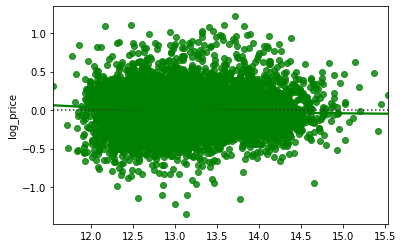

In [63]:
sns.residplot(y_log_pred, df['log_price'], lowess=True, color="g")

**Plotting the Distribution of the Residuals**

In [64]:
log_residuals =  df['log_price']- y_log_pred

/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


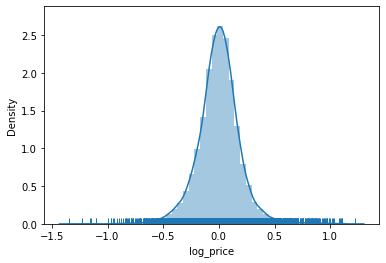

In [65]:
sns.distplot(log_residuals, kde=True, rug=True);

In [66]:
print (stats.shapiro(log_residuals))


ShapiroResult(statistic=0.9633583426475525, pvalue=0.0)


/Users/markrubin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**QQ-Plot To Determine if the Data is Normally Distributed.**

In [ ]:
fig = sm.qqplot(log_residuals,line='s')
plt.show()

In [ ]:
# #break the colums in to groups to plot 4 on a row at a time
# n = 4
# row_groups= [model_data[i:i+n] for i in range(0, len(model_data), n) ]

In [ ]:
# for i in row_groups:
#     pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, kind="reg", height=3)

In [ ]:
df.columns

**Train Test Split**

In [ ]:
features = ['yr_built', 'sqft_living', 'sqft_lot', 'sqft_percentage', 'grade', 'condition', 'floors', 
              'bathrooms','bedrooms','sqft_living15', 'sqft_lot15',
            'zipcode_98058','zipcode_98115','zipcode_98006', 'zipcode_98034', 'zipcode_98052', 'zipcode_98031', 'zipcode_98007', 
            'zipcode_98199', 'zipcode_98027', 'zipcode_98119', 'zipcode_98122', 'zipcode_98155','zipcode_98055','zipcode_98118', 'zipcode_98014',
            'zipcode_98059', 'zipcode_98004', 'zipcode_98053', 'zipcode_98072', 'zipcode_98133', 'zipcode_98092','zipcode_98074',
            'zipcode_98125', 'zipcode_98045','zipcode_98106','zipcode_98022', 'zipcode_98177', 'zipcode_98008', 'zipcode_98002',
            'zipcode_98040', 'zipcode_98029', 'zipcode_98042','zipcode_98065','zipcode_98056','zipcode_98144','zipcode_98188',
            'zipcode_98109', 'zipcode_98010', 'zipcode_98075', 'zipcode_98198', 'zipcode_98030', 'zipcode_98105','zipcode_98023',
            'zipcode_98028', 'zipcode_98112', 'zipcode_98038', 'zipcode_98116', 'zipcode_98103', 'zipcode_98178','zipcode_98168','zipcode_98005',
            'zipcode_98077','zipcode_98146','zipcode_98011','zipcode_98126','zipcode_98108', 'zipcode_98136', 'zipcode_98033',
            'zipcode_98003', 'zipcode_98117','zipcode_98107','zipcode_98019','zipcode_98102','zipcode_98032', 'zipcode_98148',
 'zipcode_98166', 'zipcode_98070', 'zipcode_98024','zipcode_98039']

In [ ]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['price'], random_state=15,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


In [ ]:
#your code here 
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)


In [ ]:
from sklearn import metrics

In [ ]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

**Filtering The Features Using Recursive Feature Elimination**

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
ols = LinearRegression()

In [ ]:
ols = LinearRegression()
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



In [ ]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [ ]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm.fit(X_train, y_train)


In [ ]:
#your code here 
y_train_pred_rfe = lm_rfe.predict(X_train[selected_rfe])

y_test_pred_rfe = lm_rfe.predict(X_test[selected_rfe])


In [ ]:
#your code here 
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rfe))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfe))

print('Training Root Mean Squared Error:' , train_rmse)
print('Testing Root Mean Squared Error:' , test_rmse)

In [ ]:
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm.fit(df[selected_rfe], df['price'])

In [ ]:
import pickle


pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()


In [ ]:
other_info = [selected_rfe]

In [ ]:
pickle_out = open('other_info.pickle', "wb")
pickle.dump(other_info, pickle_out)
pickle_out.close()